In [18]:
import os
import json

import pandas as pd
from glob import glob
import numpy as np

In [2]:
# get the path of one directory above the actual one an then get the reference to ./output/results

current_dir = os.path.dirname(os.path.abspath(os.getcwd()))
output_dir = os.path.join(current_dir, "output", "results")
print('Current dir:', current_dir)
print('Output dir:', output_dir)

Current dir: /home/moovz/code/Mestrado
Output dir: /home/moovz/code/Mestrado/output/results


In [7]:
data = []
for json_file in glob(os.path.join(output_dir, "**", "*.json"), recursive=True):
    if "first_tests" not in json_file:
        with open(json_file, "r") as f:
            json_data = json.load(f)
            data.append(json_data)

df = pd.DataFrame()

columns = ["EDGE_STRATEGY", "RANDOM_SEED", "DOWN_SAMPLE", "N", "QB_LINK", "GCN_RESULTS", "MLP_RESULTS", "RF_RESULTS"]
df = pd.DataFrame(columns=columns)

for item in data:
    row = {
        "EDGE_STRATEGY": item["config"]["EDGE_STRATEGY"],
        "RANDOM_SEED": item["config"]["RANDOM_SEED"],
        "DOWN_SAMPLE": item["config"]["DOWN_SAMPLE"],
        "N": item["config"]["N"],
        "QB_LINK": item["config"]["QB_LINK"],
        "GCN_RESULTS": item["best_gcn_results"],
        "MLP_RESULTS": item["mlp_results"],
        "RF_RESULTS": item["rf_results"]
    }
    df.loc[len(df)] = row

df.tail()

,EDGE_STRATEGY,RANDOM_SEED,DOWN_SAMPLE,N,QB_LINK,GCN_RESULTS,MLP_RESULTS,RF_RESULTS
235,RNG,6,False,2,True,"{'Rush': {'precision': 0.6180159635119726, 're...","{'Rush': {'precision': 0.5954118873826904, 're...","{'Rush': {'precision': 0.6614832535885168, 're..."
236,RNG,1,True,2,True,"{'Rush': {'precision': 0.6949602122015915, 're...","{'Rush': {'precision': 0.6405295315682281, 're...","{'Rush': {'precision': 0.6945244956772334, 're..."
237,RNG,6,True,2,False,"{'Rush': {'precision': 0.707906976744186, 'rec...","{'Rush': {'precision': 0.6489874638379942, 're...","{'Rush': {'precision': 0.6941747572815534, 're..."
238,RNG,3,True,2,True,"{'Rush': {'precision': 0.5149035651665692, 're...","{'Rush': {'precision': 0.6413916146297948, 're...","{'Rush': {'precision': 0.6929057337220602, 're..."
239,RNG,2,True,2,True,"{'Rush': {'precision': 0.6209677419354839, 're...","{'Rush': {'precision': 0.6586073500967118, 're...","{'Rush': {'precision': 0.6948493683187561, 're..."


In [8]:
###############################################################################################################################
###############################################################################################################################
# MAX AND AVERAGE ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL
###############################################################################################################################
###############################################################################################################################

print("MAX ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL")
summary_data = []
for edge_strategy in df["EDGE_STRATEGY"].unique():
    gcn_acc = df[df["EDGE_STRATEGY"] == edge_strategy]["GCN_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).max()
    mlp_acc = df[df["EDGE_STRATEGY"] == edge_strategy]["MLP_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).max()
    rf_acc = df[df["EDGE_STRATEGY"] == edge_strategy]["RF_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).max()

    summary_data.append({
        "EDGE_STRATEGY": edge_strategy,
        "GCN_ACCURACY": gcn_acc,
        "MLP_ACCURACY": mlp_acc,
        "RF_ACCURACY": rf_acc
    })

summary_df = pd.DataFrame(summary_data)
display(summary_df)
print('===========================================================================')
print('===========================================================================\n')

print("AVERAGE ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL")
average_data = []
for edge_strategy in df["EDGE_STRATEGY"].unique():
    gcn_acc = df[df["EDGE_STRATEGY"] == edge_strategy]["GCN_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).mean()
    mlp_acc = df[df["EDGE_STRATEGY"] == edge_strategy]["MLP_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).mean()
    rf_acc = df[df["EDGE_STRATEGY"] == edge_strategy]["RF_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).mean()

    average_data.append({
        "EDGE_STRATEGY": edge_strategy,
        "GCN_AVERAGE_ACCURACY": gcn_acc,
        "MLP_AVERAGE_ACCURACY": mlp_acc,
        "RF_AVERAGE_ACCURACY": rf_acc
    })

average_df = pd.DataFrame(average_data)
display(average_df)

MAX ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL


,EDGE_STRATEGY,GCN_ACCURACY,MLP_ACCURACY,RF_ACCURACY
0,MST,0.779394,0.678063,0.722000
1,QB-CLOSEST-,0.728351,0.680573,0.723895
2,CLOSEST-,0.745029,0.681617,0.722196
3,DELAUNAY,0.704524,0.679181,0.719191
4,GABRIEL,0.730670,0.676292,0.723602
5,RNG,0.766915,0.677702,0.720903



AVERAGE ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL


,EDGE_STRATEGY,GCN_AVERAGE_ACCURACY,MLP_AVERAGE_ACCURACY,RF_AVERAGE_ACCURACY
0,MST,0.697750,0.663646,0.708589
1,QB-CLOSEST-,0.689017,0.664527,0.709254
2,CLOSEST-,0.724506,0.662381,0.708944
3,DELAUNAY,0.661262,0.663362,0.709205
4,GABRIEL,0.671557,0.663816,0.709425
5,RNG,0.685045,0.664610,0.709022


In [10]:
###############################################################################################################################
###############################################################################################################################
# MAX AND AVERAGE ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN DOWN_SAMPLE IS TRUE AND WHEN IT IS FALSE
###############################################################################################################################
###############################################################################################################################

print("MAX ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN DOWN_SAMPLE IS TRUE AND WHEN IT IS FALSE")
downsample_data = []
for edge_strategy in df["EDGE_STRATEGY"].unique():
    for down_sample in [True, False]:
        gcn_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["DOWN_SAMPLE"] == down_sample)]["GCN_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).max()
        mlp_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["DOWN_SAMPLE"] == down_sample)]["MLP_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).max()
        rf_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["DOWN_SAMPLE"] == down_sample)]["RF_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).max()
        
        downsample_data.append({
            "EDGE_STRATEGY": edge_strategy,
            "DOWN_SAMPLE": down_sample,
            "GCN_MACRO_F1_SCORE": gcn_acc,
            "MLP_MACRO_F1_SCORE": mlp_acc,
            "RF_MACRO_F1_SCORE": rf_acc
        })
max_down_sample_settings = pd.DataFrame(downsample_data)
display(max_down_sample_settings)
print('===========================================================================')
print('===========================================================================\n')

print("AVERAGE ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN DOWN_SAMPLE IS TRUE AND WHEN IT IS FALSE")
downsample_data = []
for edge_strategy in df["EDGE_STRATEGY"].unique():
    for down_sample in [True, False]:
        gcn_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["DOWN_SAMPLE"] == down_sample)]["GCN_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).mean()
        mlp_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["DOWN_SAMPLE"] == down_sample)]["MLP_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).mean()
        rf_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["DOWN_SAMPLE"] == down_sample)]["RF_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).mean()
        
        downsample_data.append({
            "EDGE_STRATEGY": edge_strategy,
            "DOWN_SAMPLE": down_sample,
            "GCN_AVERAGE_MACRO_F1_SCORE": gcn_acc,
            "MLP_AVERAGE_MACRO_F1_SCORE": mlp_acc,
            "RF_AVERAGE_MACRO_F1_SCORE": rf_acc
        })

average_down_sample_settings = pd.DataFrame(downsample_data)
display(average_down_sample_settings)

MAX ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN DOWN_SAMPLE IS TRUE AND WHEN IT IS FALSE


,EDGE_STRATEGY,DOWN_SAMPLE,GCN_MACRO_F1_SCORE,MLP_MACRO_F1_SCORE,RF_MACRO_F1_SCORE
0,MST,True,0.763142,0.678063,0.722000
1,MST,False,0.779394,0.673854,0.713941
2,QB-CLOSEST-,True,0.715408,0.680573,0.723895
3,QB-CLOSEST-,False,0.728351,0.677328,0.711568
4,CLOSEST-,True,0.737931,0.678988,0.722196
5,CLOSEST-,False,0.745029,0.681617,0.711173
6,DELAUNAY,True,0.702623,0.679181,0.719191
7,DELAUNAY,False,0.704524,0.677184,0.711047
8,GABRIEL,True,0.730670,0.675081,0.723602
9,GABRIEL,False,0.729781,0.676292,0.711568



AVERAGE ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN DOWN_SAMPLE IS TRUE AND WHEN IT IS FALSE


,EDGE_STRATEGY,DOWN_SAMPLE,GCN_AVERAGE_MACRO_F1_SCORE,MLP_AVERAGE_MACRO_F1_SCORE,RF_AVERAGE_MACRO_F1_SCORE
0,MST,True,0.688002,0.667019,0.713830
1,MST,False,0.707498,0.660274,0.703347
2,QB-CLOSEST-,True,0.678780,0.667341,0.714223
3,QB-CLOSEST-,False,0.699253,0.661713,0.704285
4,CLOSEST-,True,0.717091,0.663264,0.714188
5,CLOSEST-,False,0.731921,0.661498,0.703700
6,DELAUNAY,True,0.654370,0.664546,0.714967
7,DELAUNAY,False,0.668155,0.662177,0.703444
8,GABRIEL,True,0.658477,0.665138,0.715438
9,GABRIEL,False,0.684637,0.662495,0.703413


In [11]:
###############################################################################################################################
###############################################################################################################################
# MAX AND AVERAGE ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN QB_LINK IS TRUE AND WHEN IT IS FALSE
###############################################################################################################################
###############################################################################################################################

print("MAX ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN QB_LINK IS TRUE AND WHEN IT IS FALSE")
qblink_data = []
for edge_strategy in df["EDGE_STRATEGY"].unique():
    for qb_link in [True, False]:
        gcn_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["QB_LINK"] == qb_link)]["GCN_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).max()
        mlp_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["QB_LINK"] == qb_link)]["MLP_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).max()
        rf_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["QB_LINK"] == qb_link)]["RF_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).max()
        
        qblink_data.append({
            "EDGE_STRATEGY": edge_strategy,
            "QB_LINK": qb_link,
            "GCN_MACRO_F1_SCORE": gcn_acc,
            "MLP_MACRO_F1_SCORE": mlp_acc,
            "RF_MACRO_F1_SCORE": rf_acc
        })
max_qb_link_settings = pd.DataFrame(qblink_data)
display(max_qb_link_settings)
print('===========================================================================')
print('===========================================================================\n')

print("AVERAGE ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN QB_LINK IS TRUE AND WHEN IT IS FALSE")
qblink_data = []
for edge_strategy in df["EDGE_STRATEGY"].unique():
    for qb_link in [True, False]:
        gcn_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["QB_LINK"] == qb_link)]["GCN_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).mean()
        mlp_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["QB_LINK"] == qb_link)]["MLP_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).mean()
        rf_acc = df[(df["EDGE_STRATEGY"] == edge_strategy) & (df["QB_LINK"] == qb_link)]["RF_RESULTS"].apply(lambda x: x["macro avg"]["f1-score"]).mean()
        
        qblink_data.append({
            "EDGE_STRATEGY": edge_strategy,
            "QB_LINK": qb_link,
            "GCN_AVERAGE_MACRO_F1_SCORE": gcn_acc,
            "MLP_AVERAGE_MACRO_F1_SCORE": mlp_acc,
            "RF_AVERAGE_MACRO_F1_SCORE": rf_acc
        })
average_qb_link_settings = pd.DataFrame(qblink_data)
display(average_qb_link_settings)

MAX ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN QB_LINK IS TRUE AND WHEN IT IS FALSE


,EDGE_STRATEGY,QB_LINK,GCN_MACRO_F1_SCORE,MLP_MACRO_F1_SCORE,RF_MACRO_F1_SCORE
0,MST,True,0.673069,0.674783,0.722000
1,MST,False,0.779394,0.678063,0.719928
2,QB-CLOSEST-,True,0.710748,0.677328,0.723895
3,QB-CLOSEST-,False,0.728351,0.680573,0.721776
4,CLOSEST-,True,0.745029,0.678988,0.720079
5,CLOSEST-,False,0.743818,0.681617,0.722196
6,DELAUNAY,True,0.667076,0.679181,0.719158
7,DELAUNAY,False,0.704524,0.676465,0.719191
8,GABRIEL,True,0.670400,0.673311,0.720912
9,GABRIEL,False,0.730670,0.676292,0.723602



AVERAGE ACCURACY VALUE FOR EACH EDGE STRATEGY AND MODEL WHEN QB_LINK IS TRUE AND WHEN IT IS FALSE


,EDGE_STRATEGY,QB_LINK,GCN_AVERAGE_MACRO_F1_SCORE,MLP_AVERAGE_MACRO_F1_SCORE,RF_AVERAGE_MACRO_F1_SCORE
0,MST,True,0.636828,0.663014,0.709453
1,MST,False,0.758672,0.664278,0.707724
2,QB-CLOSEST-,True,0.681227,0.665516,0.709987
3,QB-CLOSEST-,False,0.696806,0.663538,0.708521
4,CLOSEST-,True,0.728595,0.662496,0.708426
5,CLOSEST-,False,0.720417,0.662266,0.709462
6,DELAUNAY,True,0.640086,0.665057,0.709974
7,DELAUNAY,False,0.682439,0.661667,0.708436
8,GABRIEL,True,0.637192,0.664052,0.709493
9,GABRIEL,False,0.705922,0.663580,0.709358


In [15]:
###############################################################################################################################
###############################################################################################################################
# BEST OVERALL CONFIGURATION ACROSS ALL PARAMETERS - UPDATED TO USE F1
###############################################################################################################################
###############################################################################################################################

print("FINDING THE BEST OVERALL CONFIGURATION")

expanded_df = df.copy()
expanded_df['GCN_MACRO_F1_SCORE'] = expanded_df['GCN_RESULTS'].apply(lambda x: x["macro avg"]["f1-score"])
expanded_df['MLP_MACRO_F1_SCORE'] = expanded_df['MLP_RESULTS'].apply(lambda x: x["macro avg"]["f1-score"])
expanded_df['RF_MACRO_F1_SCORE'] = expanded_df['RF_RESULTS'].apply(lambda x: x["macro avg"]["f1-score"])

best_gcn_idx = expanded_df['GCN_MACRO_F1_SCORE'].idxmax()
best_mlp_idx = expanded_df['MLP_MACRO_F1_SCORE'].idxmax()
best_rf_idx = expanded_df['RF_MACRO_F1_SCORE'].idxmax()

best_configs = pd.DataFrame({
    'Model': ['GCN', 'MLP', 'RF'],
    'Best_Macro_F1_Score': [
        expanded_df.loc[best_gcn_idx, 'GCN_MACRO_F1_SCORE'],
        expanded_df.loc[best_mlp_idx, 'MLP_MACRO_F1_SCORE'],
        expanded_df.loc[best_rf_idx, 'RF_MACRO_F1_SCORE']
    ],
    'Edge_Strategy': [
        expanded_df.loc[best_gcn_idx, 'EDGE_STRATEGY'],
        expanded_df.loc[best_mlp_idx, 'EDGE_STRATEGY'],
        expanded_df.loc[best_rf_idx, 'EDGE_STRATEGY']
    ],
    'Down_Sample': [
        expanded_df.loc[best_gcn_idx, 'DOWN_SAMPLE'],
        expanded_df.loc[best_mlp_idx, 'DOWN_SAMPLE'],
        expanded_df.loc[best_rf_idx, 'DOWN_SAMPLE']
    ],
    'QB_Link': [
        expanded_df.loc[best_gcn_idx, 'QB_LINK'],
        expanded_df.loc[best_mlp_idx, 'QB_LINK'],
        expanded_df.loc[best_rf_idx, 'QB_LINK']
    ],
    'N': [
        expanded_df.loc[best_gcn_idx, 'N'],
        expanded_df.loc[best_mlp_idx, 'N'],
        expanded_df.loc[best_rf_idx, 'N']
    ],
    'Random_Seed': [
        expanded_df.loc[best_gcn_idx, 'RANDOM_SEED'],
        expanded_df.loc[best_mlp_idx, 'RANDOM_SEED'],
        expanded_df.loc[best_rf_idx, 'RANDOM_SEED']
    ]
})

display(best_configs.sort_values('Best_Macro_F1_Score', ascending=False))

overall_best_idx = best_configs['Best_Macro_F1_Score'].idxmax()
overall_best = best_configs.iloc[overall_best_idx]
print("\nBEST OVERALL CONFIGURATION:")
print(f"Model: {overall_best['Model']}")
print(f"Macro F1 Score: {overall_best['Best_Macro_F1_Score']:.4f}")
print(f"Edge Strategy: {overall_best['Edge_Strategy']}")
print(f"Down Sample: {overall_best['Down_Sample']}")
print(f"QB Link: {overall_best['QB_Link']}")
print(f"N: {overall_best['N']}")
print(f"Random Seed: {overall_best['Random_Seed']}")

FINDING THE BEST OVERALL CONFIGURATION


,Model,Best_Macro_F1_Score,Edge_Strategy,Down_Sample,QB_Link,N,Random_Seed
0,GCN,0.779394,MST,False,False,2,5
2,RF,0.723895,QB-CLOSEST-,True,True,2,8
1,MLP,0.681617,CLOSEST-,False,False,2,6



BEST OVERALL CONFIGURATION:
Model: GCN
Macro F1 Score: 0.7794
Edge Strategy: MST
Down Sample: False
QB Link: False
N: 2
Random Seed: 5


DETAILED METRICS FOR THE BEST CONFIGURATIONS OF EACH MODEL


,GCN,MLP,RF
Rush_Precision,0.70078,0.70078,0.70078
Rush_Recall,0.784934,0.784934,0.784934
Rush_F1,0.740474,0.740474,0.740474
Pass_Precision,0.755583,0.755583,0.755583
Pass_Recall,0.664847,0.664847,0.664847
Pass_F1,0.707317,0.707317,0.707317
Accuracy,0.724891,0.724891,0.724891
Macro_F1,0.723895,0.723895,0.723895


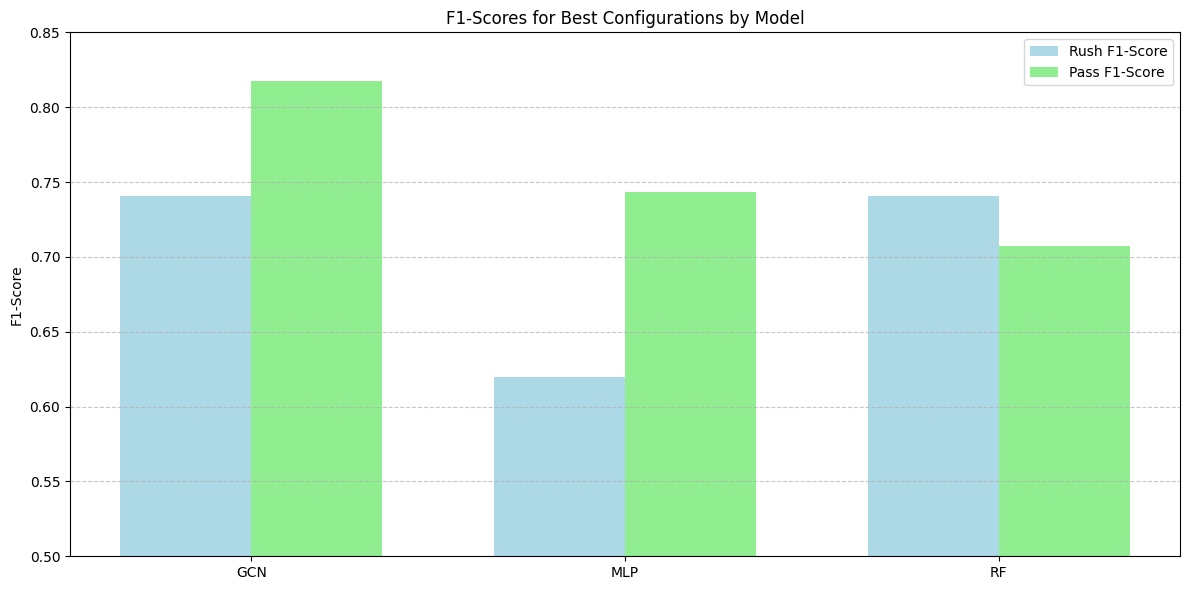

In [14]:
###############################################################################################################################
###############################################################################################################################
# CLASS-SPECIFIC METRICS FOR THE BEST CONFIGURATIONS
###############################################################################################################################
###############################################################################################################################

print("DETAILED METRICS FOR THE BEST CONFIGURATIONS OF EACH MODEL")

def extract_class_metrics(results):
    return {
        'Rush_Precision': results['Rush']['precision'],
        'Rush_Recall': results['Rush']['recall'],
        'Rush_F1': results['Rush']['f1-score'],
        'Pass_Precision': results['Pass']['precision'],
        'Pass_Recall': results['Pass']['recall'],
        'Pass_F1': results['Pass']['f1-score'],
        'Accuracy': results['accuracy'],
        'Macro_F1': results['macro avg']['f1-score']
    }

best_metrics = pd.DataFrame({
    'Model': ['GCN', 'MLP', 'RF'],
    **extract_class_metrics(expanded_df.loc[best_gcn_idx, 'GCN_RESULTS']),
    **extract_class_metrics(expanded_df.loc[best_mlp_idx, 'MLP_RESULTS']),
    **extract_class_metrics(expanded_df.loc[best_rf_idx, 'RF_RESULTS'])
}).T

best_metrics.columns = ['GCN', 'MLP', 'RF']
best_metrics = best_metrics.drop('Model')

display(best_metrics)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
x = ['GCN', 'MLP', 'RF']
rush_f1 = [
    expanded_df.loc[best_gcn_idx, 'GCN_RESULTS']['Rush']['f1-score'],
    expanded_df.loc[best_mlp_idx, 'MLP_RESULTS']['Rush']['f1-score'],
    expanded_df.loc[best_rf_idx, 'RF_RESULTS']['Rush']['f1-score']
]
pass_f1 = [
    expanded_df.loc[best_gcn_idx, 'GCN_RESULTS']['Pass']['f1-score'],
    expanded_df.loc[best_mlp_idx, 'MLP_RESULTS']['Pass']['f1-score'],
    expanded_df.loc[best_rf_idx, 'RF_RESULTS']['Pass']['f1-score']
]

x_pos = range(len(x))
width = 0.35

plt.bar([p - width/2 for p in x_pos], rush_f1, width, label='Rush F1-Score', color='lightblue')
plt.bar([p + width/2 for p in x_pos], pass_f1, width, label='Pass F1-Score', color='lightgreen')

plt.ylabel('F1-Score')
plt.title('F1-Scores for Best Configurations by Model')
plt.xticks(x_pos, x)
plt.ylim(0.5, 0.85)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

ANALYSIS OF PARAMETER IMPACT ON MODEL PERFORMANCE

IMPACT OF QB_LINK PARAMETER (TRUE vs FALSE) ON MACRO F1-SCORE


,Edge_Strategy,GCN_QB_Impact,MLP_QB_Impact,RF_QB_Impact,Avg_Impact
2,CLOSEST-,0.008179,0.000230,-0.001036,0.002457
1,QB-CLOSEST-,-0.015579,0.001978,0.001466,-0.004045
3,DELAUNAY,-0.042353,0.003390,0.001538,-0.012475
4,GABRIEL,-0.068730,0.000472,0.000135,-0.022708
5,RNG,-0.117837,0.001139,-0.000070,-0.038923
0,MST,-0.121844,-0.001264,0.001729,-0.040459


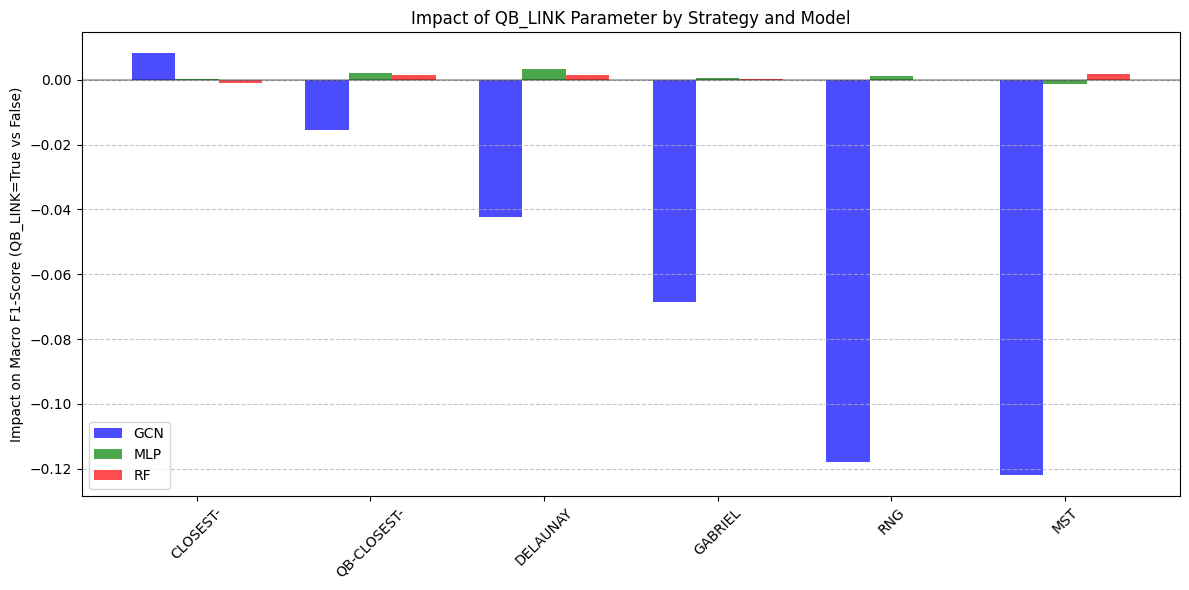


IMPACT OF DOWN_SAMPLE PARAMETER (TRUE vs FALSE) ON MACRO F1-SCORE


,Edge_Strategy,GCN_Down_Impact,MLP_Down_Impact,RF_Down_Impact,Avg_Impact
3,DELAUNAY,-0.013785,0.002369,0.011523,0.000036
0,MST,-0.019496,0.006745,0.010483,-0.000756
2,CLOSEST-,-0.014829,0.001767,0.010488,-0.000858
1,QB-CLOSEST-,-0.020473,0.005627,0.009938,-0.001636
4,GABRIEL,-0.026160,0.002643,0.012025,-0.003831
5,RNG,-0.040875,0.002959,0.010658,-0.009086


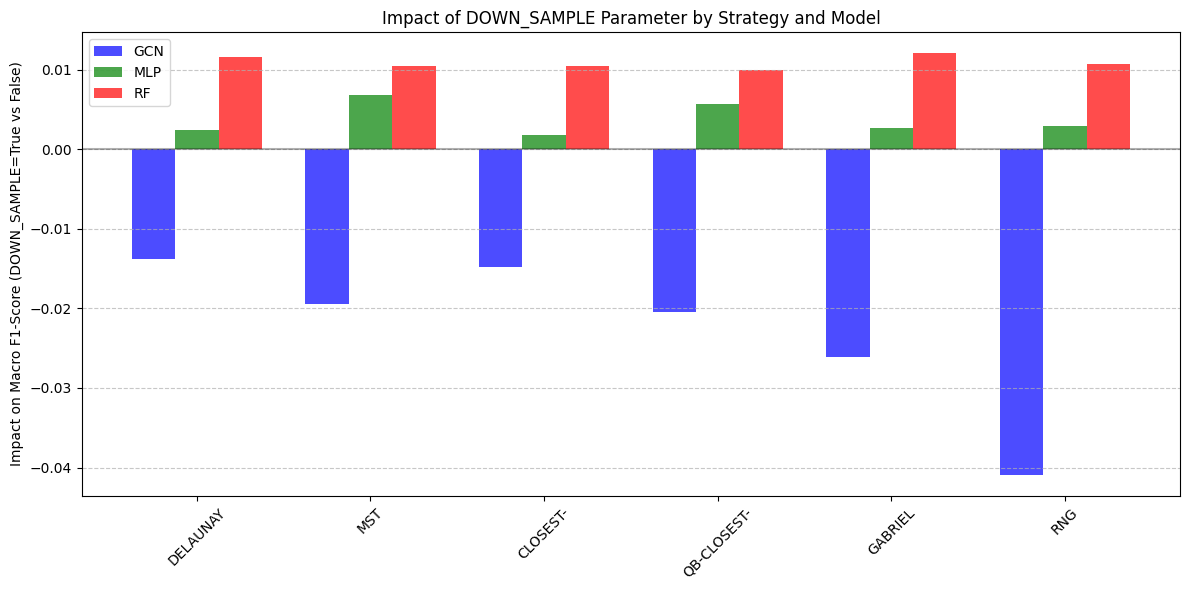

In [16]:
###############################################################################################################################
###############################################################################################################################
# IMPACT ANALYSIS OF QB_LINK AND DOWN_SAMPLE PARAMETERS - UPDATED TO USE F1
###############################################################################################################################
###############################################################################################################################

print("ANALYSIS OF PARAMETER IMPACT ON MODEL PERFORMANCE")

qb_impact = pd.DataFrame({
    'Edge_Strategy': [],
})

for strategy in expanded_df['EDGE_STRATEGY'].unique():
    strategy_df = expanded_df[expanded_df['EDGE_STRATEGY'] == strategy]
    
    gcn_true = strategy_df[strategy_df['QB_LINK'] == True]['GCN_MACRO_F1_SCORE'].mean()
    gcn_false = strategy_df[strategy_df['QB_LINK'] == False]['GCN_MACRO_F1_SCORE'].mean()
    
    mlp_true = strategy_df[strategy_df['QB_LINK'] == True]['MLP_MACRO_F1_SCORE'].mean()
    mlp_false = strategy_df[strategy_df['QB_LINK'] == False]['MLP_MACRO_F1_SCORE'].mean()
    
    rf_true = strategy_df[strategy_df['QB_LINK'] == True]['RF_MACRO_F1_SCORE'].mean()
    rf_false = strategy_df[strategy_df['QB_LINK'] == False]['RF_MACRO_F1_SCORE'].mean()
    
    qb_impact = pd.concat([qb_impact, pd.DataFrame({
        'Edge_Strategy': [strategy],
        'GCN_QB_Impact': [gcn_true - gcn_false],
        'MLP_QB_Impact': [mlp_true - mlp_false],
        'RF_QB_Impact': [rf_true - rf_false]
    })], ignore_index=True)

qb_impact['Avg_Impact'] = qb_impact[['GCN_QB_Impact', 'MLP_QB_Impact', 'RF_QB_Impact']].mean(axis=1)
qb_impact = qb_impact.sort_values('Avg_Impact', ascending=False)

print("\nIMPACT OF QB_LINK PARAMETER (TRUE vs FALSE) ON MACRO F1-SCORE")
display(qb_impact)

plt.figure(figsize=(12, 6))
strategies = qb_impact['Edge_Strategy'].tolist()
x_pos = range(len(strategies))
width = 0.25

plt.bar([p - width for p in x_pos], qb_impact['GCN_QB_Impact'], width, label='GCN', color='blue', alpha=0.7)
plt.bar([p for p in x_pos], qb_impact['MLP_QB_Impact'], width, label='MLP', color='green', alpha=0.7)
plt.bar([p + width for p in x_pos], qb_impact['RF_QB_Impact'], width, label='RF', color='red', alpha=0.7)

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.ylabel('Impact on Macro F1-Score (QB_LINK=True vs False)')
plt.title('Impact of QB_LINK Parameter by Strategy and Model')
plt.xticks(x_pos, strategies, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

down_impact = pd.DataFrame({
    'Edge_Strategy': [],
})

for strategy in expanded_df['EDGE_STRATEGY'].unique():
    strategy_df = expanded_df[expanded_df['EDGE_STRATEGY'] == strategy]
    
    gcn_true = strategy_df[strategy_df['DOWN_SAMPLE'] == True]['GCN_MACRO_F1_SCORE'].mean()
    gcn_false = strategy_df[strategy_df['DOWN_SAMPLE'] == False]['GCN_MACRO_F1_SCORE'].mean()
    
    mlp_true = strategy_df[strategy_df['DOWN_SAMPLE'] == True]['MLP_MACRO_F1_SCORE'].mean()
    mlp_false = strategy_df[strategy_df['DOWN_SAMPLE'] == False]['MLP_MACRO_F1_SCORE'].mean()
    
    rf_true = strategy_df[strategy_df['DOWN_SAMPLE'] == True]['RF_MACRO_F1_SCORE'].mean()
    rf_false = strategy_df[strategy_df['DOWN_SAMPLE'] == False]['RF_MACRO_F1_SCORE'].mean()
    
    down_impact = pd.concat([down_impact, pd.DataFrame({
        'Edge_Strategy': [strategy],
        'GCN_Down_Impact': [gcn_true - gcn_false],
        'MLP_Down_Impact': [mlp_true - mlp_false],
        'RF_Down_Impact': [rf_true - rf_false]
    })], ignore_index=True)

down_impact['Avg_Impact'] = down_impact[['GCN_Down_Impact', 'MLP_Down_Impact', 'RF_Down_Impact']].mean(axis=1)
down_impact = down_impact.sort_values('Avg_Impact', ascending=False)

print("\nIMPACT OF DOWN_SAMPLE PARAMETER (TRUE vs FALSE) ON MACRO F1-SCORE")
display(down_impact)

plt.figure(figsize=(12, 6))
strategies = down_impact['Edge_Strategy'].tolist()
x_pos = range(len(strategies))

plt.bar([p - width for p in x_pos], down_impact['GCN_Down_Impact'], width, label='GCN', color='blue', alpha=0.7)
plt.bar([p for p in x_pos], down_impact['MLP_Down_Impact'], width, label='MLP', color='green', alpha=0.7)
plt.bar([p + width for p in x_pos], down_impact['RF_Down_Impact'], width, label='RF', color='red', alpha=0.7)

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.ylabel('Impact on Macro F1-Score (DOWN_SAMPLE=True vs False)')
plt.title('Impact of DOWN_SAMPLE Parameter by Strategy and Model')
plt.xticks(x_pos, strategies, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

CONFUSION MATRIX VISUALIZATION FOR BEST CONFIGURATIONS


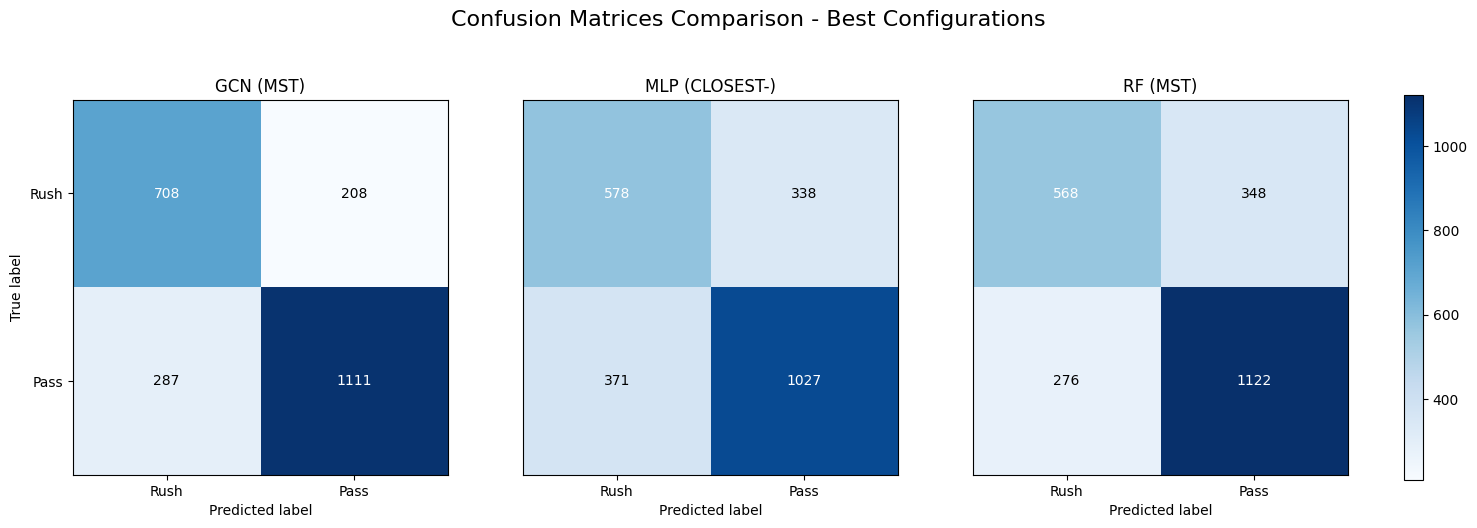

In [ ]:
###############################################################################################################################
###############################################################################################################################
# CONFUSION MATRIX VISUALIZATION FOR BEST CONFIGURATIONS (MATPLOTLIB VERSION)
###############################################################################################################################
###############################################################################################################################

print("CONFUSION MATRIX VISUALIZATION FOR BEST CONFIGURATIONS")

import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title, cmap='Blues'):
    plt.figure(figsize=(8, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap(cmap))
    plt.colorbar()
    
    plt.title(f'Confusion Matrix - {title}', fontsize=14)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    
    plt.xticks([0, 1], ['Rush', 'Pass'])
    plt.yticks([0, 1], ['Rush', 'Pass'])
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]),
                    ha="center", va="center", color="white" if cm[i, j] > cm.max()/2 else "black")
    
    plt.tight_layout()
    # plt.show()

best_gcn_cm = np.array(expanded_df.loc[best_gcn_idx, 'GCN_RESULTS']['confusion_matrix'])
best_mlp_cm = np.array(expanded_df.loc[best_mlp_idx, 'MLP_RESULTS']['confusion_matrix'])
best_rf_cm = np.array(expanded_df.loc[best_rf_idx, 'RF_RESULTS']['confusion_matrix'])

# Plot all three matrices
# plot_confusion_matrix(best_gcn_cm, f"GCN ({expanded_df.loc[best_gcn_idx, 'EDGE_STRATEGY']})")
# plot_confusion_matrix(best_mlp_cm, f"MLP ({expanded_df.loc[best_mlp_idx, 'EDGE_STRATEGY']})")
# plot_confusion_matrix(best_rf_cm, f"RF ({expanded_df.loc[best_rf_idx, 'EDGE_STRATEGY']})")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = ["GCN", "MLP", "RF"]
matrices = [best_gcn_cm, best_mlp_cm, best_rf_cm]
strategies = [
    expanded_df.loc[best_gcn_idx, 'EDGE_STRATEGY'],
    expanded_df.loc[best_mlp_idx, 'EDGE_STRATEGY'],
    expanded_df.loc[best_rf_idx, 'EDGE_STRATEGY']
]

vmin = min(matrices[0].min(), matrices[1].min(), matrices[2].min())
vmax = max(matrices[0].max(), matrices[1].max(), matrices[2].max())

for i, (ax, cm, model, strategy) in enumerate(zip(axes, matrices, models, strategies)):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'), vmin=vmin, vmax=vmax)
    ax.set_title(f'{model} ({strategy})')
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Rush', 'Pass'])
    
    if i == 0:
        ax.set_yticks([0, 1])
        ax.set_yticklabels(['Rush', 'Pass'])
        ax.set_ylabel('True label')
    else:
        ax.set_yticks([])
    
    ax.set_xlabel('Predicted label')
    
    for ii in range(cm.shape[0]):
        for jj in range(cm.shape[1]):
            ax.text(jj, ii, str(cm[ii, jj]),
                   ha="center", va="center", color="white" if cm[ii, jj] > vmax/2 else "black")

fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.046, pad=0.04)
plt.suptitle('Confusion Matrices Comparison - Best Configurations', y=1.05, fontsize=16)
plt.show()

TRAINING CURVE ANALYSIS FOR BEST GCN CONFIGURATION


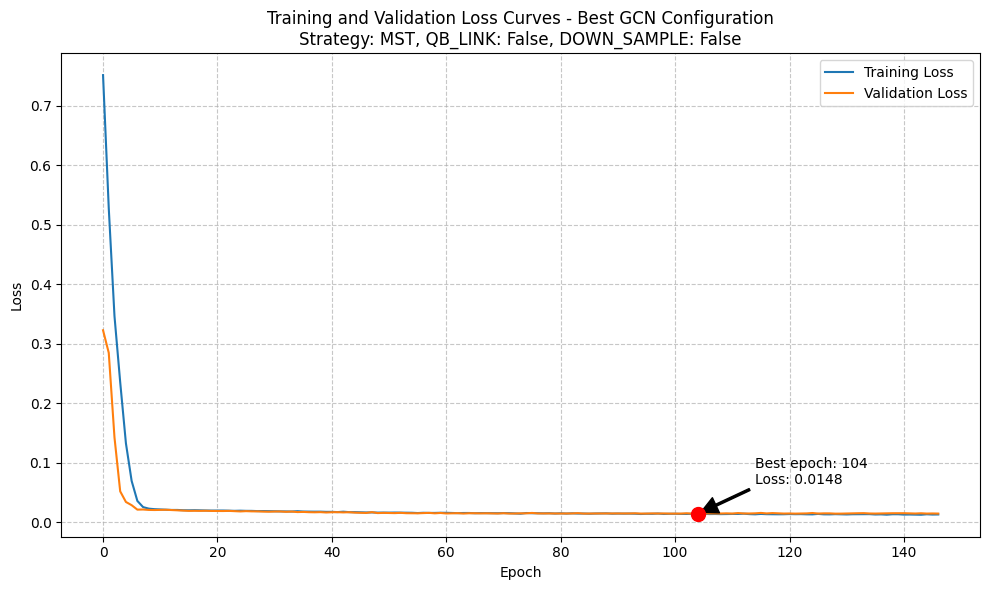

In [ ]:
###############################################################################################################################
###############################################################################################################################
# TRAINING CURVE ANALYSIS FOR BEST GCN CONFIGURATION
###############################################################################################################################
###############################################################################################################################

print("TRAINING CURVE ANALYSIS FOR BEST GCN CONFIGURATION")

def find_result_json(edge_strategy, random_seed, down_sample, qb_link, n):
    matching_files = []
    
    for json_file in glob(os.path.join(output_dir, "**", "*.json"), recursive=True):
        if "first_tests" in json_file:
            continue
            
        try:
            with open(json_file, "r") as f:
                json_data = json.load(f)
                
            config = json_data.get("config", {})
            if (config.get("EDGE_STRATEGY") == edge_strategy and
                config.get("RANDOM_SEED") == random_seed and
                config.get("DOWN_SAMPLE") == down_sample and
                config.get("QB_LINK") == qb_link and
                config.get("N") == n):
                matching_files.append((json_file, json_data))
        except:
            continue
    
    return matching_files

best_gcn_config = {
    'edge_strategy': expanded_df.loc[best_gcn_idx, 'EDGE_STRATEGY'],
    'random_seed': expanded_df.loc[best_gcn_idx, 'RANDOM_SEED'],
    'down_sample': expanded_df.loc[best_gcn_idx, 'DOWN_SAMPLE'],
    'qb_link': expanded_df.loc[best_gcn_idx, 'QB_LINK'],
    'n': expanded_df.loc[best_gcn_idx, 'N']
}

matching_files = find_result_json(**best_gcn_config)

if matching_files:
    file_path, json_data = matching_files[0]
    
    train_losses = json_data.get("train_losses", [])
    val_losses = json_data.get("val_losses", [])
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss Curves - Best GCN Configuration\n'
              f'Strategy: {best_gcn_config["edge_strategy"]}, '
              f'QB_LINK: {best_gcn_config["qb_link"]}, '
              f'DOWN_SAMPLE: {best_gcn_config["down_sample"]}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    min_val_loss_epoch = np.argmin(val_losses)
    min_val_loss = val_losses[min_val_loss_epoch]
    plt.scatter(min_val_loss_epoch, min_val_loss, c='red', s=100, zorder=10)
    plt.annotate(f'Best epoch: {min_val_loss_epoch}\nLoss: {min_val_loss:.4f}',
                xy=(min_val_loss_epoch, min_val_loss),
                xytext=(min_val_loss_epoch+10, min_val_loss+0.05),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    plt.tight_layout()
    plt.show()
else:
    print("Could not find the JSON file with training curves for the best GCN configuration.")

COMPREHENSIVE PERFORMANCE SUMMARY

TOP 3 CONFIGURATIONS FOR EACH MODEL:


,EDGE_STRATEGY,DOWN_SAMPLE,QB_LINK,N,RANDOM_SEED,Macro_F1_Score,Model
24,MST,False,False,2,5,0.779394,GCN
3,MST,False,False,2,2,0.771377,GCN
10,MST,False,False,2,6,0.767936,GCN
76,QB-CLOSEST-,True,True,2,8,0.723895,RF
177,GABRIEL,True,False,2,5,0.723602,RF
91,CLOSEST-,True,False,2,2,0.722196,RF
112,CLOSEST-,False,False,2,6,0.681617,MLP
59,QB-CLOSEST-,True,False,2,5,0.680573,MLP
72,QB-CLOSEST-,True,False,2,3,0.680141,MLP



OVERALL PERFORMANCE SUMMARY BY EDGE STRATEGY:


,EDGE_STRATEGY,GCN_MAX,GCN_AVG,MLP_MAX,MLP_AVG,RF_MAX,RF_AVG,OVERALL_AVG
2,CLOSEST-,0.745029,0.724506,0.681617,0.662381,0.722196,0.708944,0.698610
0,MST,0.779394,0.697750,0.678063,0.663646,0.722000,0.708589,0.689995
1,QB-CLOSEST-,0.728351,0.689017,0.680573,0.664527,0.723895,0.709254,0.687599
5,RNG,0.766915,0.685045,0.677702,0.664610,0.720903,0.709022,0.686226
4,GABRIEL,0.730670,0.671557,0.676292,0.663816,0.723602,0.709425,0.681599
3,DELAUNAY,0.704524,0.661262,0.679181,0.663362,0.719191,0.709205,0.677943


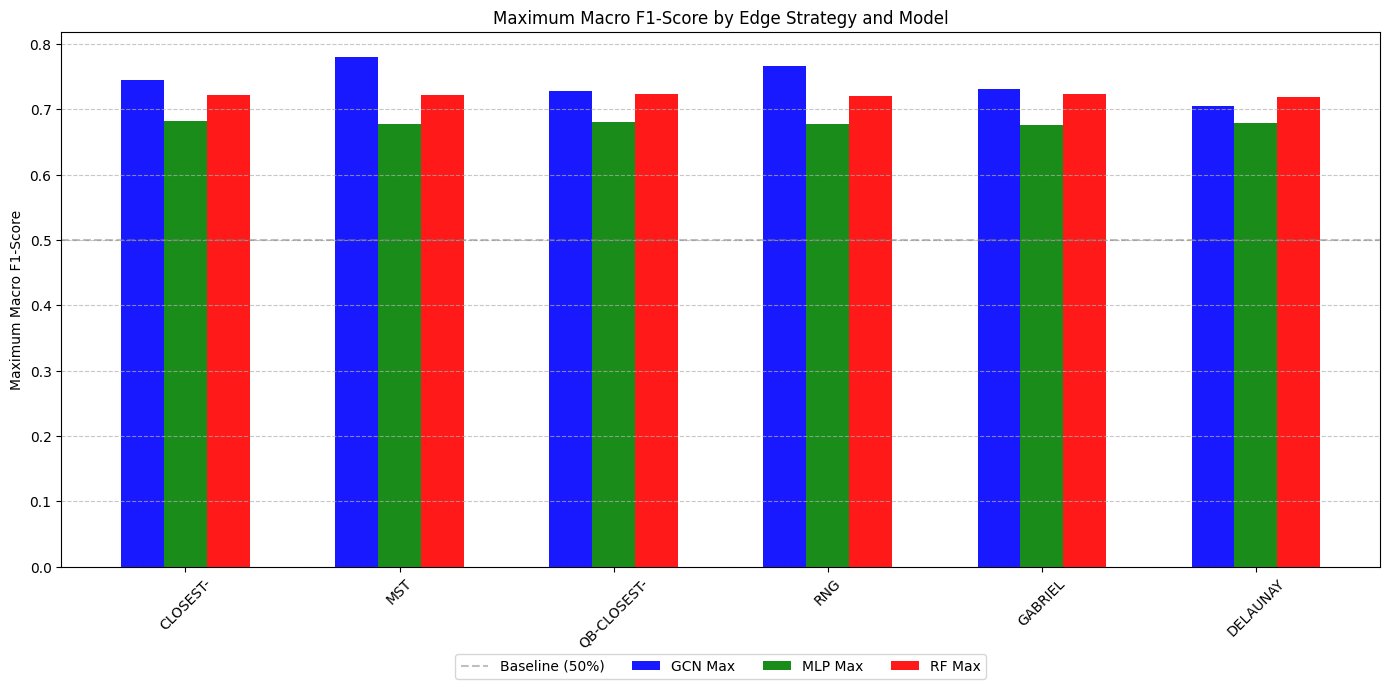

In [19]:
###############################################################################################################################
###############################################################################################################################
# COMPREHENSIVE PERFORMANCE SUMMARY - UPDATED TO USE F1
###############################################################################################################################
###############################################################################################################################

print("COMPREHENSIVE PERFORMANCE SUMMARY")

top_n = 3

# For GCN
top_gcn_idx = expanded_df.sort_values('GCN_MACRO_F1_SCORE', ascending=False).head(top_n).index
top_gcn = expanded_df.loc[top_gcn_idx, ['EDGE_STRATEGY', 'DOWN_SAMPLE', 'QB_LINK', 'N', 'RANDOM_SEED', 'GCN_MACRO_F1_SCORE']]
top_gcn = top_gcn.rename(columns={'GCN_MACRO_F1_SCORE': 'Macro_F1_Score'})
top_gcn['Model'] = 'GCN'

# For MLP
top_mlp_idx = expanded_df.sort_values('MLP_MACRO_F1_SCORE', ascending=False).head(top_n).index
top_mlp = expanded_df.loc[top_mlp_idx, ['EDGE_STRATEGY', 'DOWN_SAMPLE', 'QB_LINK', 'N', 'RANDOM_SEED', 'MLP_MACRO_F1_SCORE']]
top_mlp = top_mlp.rename(columns={'MLP_MACRO_F1_SCORE': 'Macro_F1_Score'})
top_mlp['Model'] = 'MLP'

# For RF
top_rf_idx = expanded_df.sort_values('RF_MACRO_F1_SCORE', ascending=False).head(top_n).index
top_rf = expanded_df.loc[top_rf_idx, ['EDGE_STRATEGY', 'DOWN_SAMPLE', 'QB_LINK', 'N', 'RANDOM_SEED', 'RF_MACRO_F1_SCORE']]
top_rf = top_rf.rename(columns={'RF_MACRO_F1_SCORE': 'Macro_F1_Score'})
top_rf['Model'] = 'RF'

# Combine all top configurations
top_configs = pd.concat([top_gcn, top_mlp, top_rf])
top_configs = top_configs.sort_values('Macro_F1_Score', ascending=False)

print(f"\nTOP {top_n} CONFIGURATIONS FOR EACH MODEL:")
display(top_configs)

# Calculate overall performance by strategy
strategy_summary = pd.DataFrame()

for strategy in expanded_df['EDGE_STRATEGY'].unique():
    strategy_data = expanded_df[expanded_df['EDGE_STRATEGY'] == strategy]
    
    summary_row = {
        'EDGE_STRATEGY': strategy,
        'GCN_MAX': strategy_data['GCN_MACRO_F1_SCORE'].max(),
        'GCN_AVG': strategy_data['GCN_MACRO_F1_SCORE'].mean(),
        'MLP_MAX': strategy_data['MLP_MACRO_F1_SCORE'].max(),
        'MLP_AVG': strategy_data['MLP_MACRO_F1_SCORE'].mean(),
        'RF_MAX': strategy_data['RF_MACRO_F1_SCORE'].max(),
        'RF_AVG': strategy_data['RF_MACRO_F1_SCORE'].mean(),
        'OVERALL_AVG': strategy_data[['GCN_MACRO_F1_SCORE', 'MLP_MACRO_F1_SCORE', 'RF_MACRO_F1_SCORE']].mean().mean()
    }
    
    strategy_summary = pd.concat([strategy_summary, pd.DataFrame([summary_row])], ignore_index=True)

strategy_summary = strategy_summary.sort_values('OVERALL_AVG', ascending=False)

print("\nOVERALL PERFORMANCE SUMMARY BY EDGE STRATEGY:")
display(strategy_summary)

plt.figure(figsize=(14, 7))
x = strategy_summary['EDGE_STRATEGY'].tolist()
x_pos = np.arange(len(x))
width = 0.2

plt.bar(x_pos - width, strategy_summary['GCN_MAX'], width, label='GCN Max', color='blue', alpha=0.9)
plt.bar(x_pos, strategy_summary['MLP_MAX'], width, label='MLP Max', color='green', alpha=0.9)
plt.bar(x_pos + width, strategy_summary['RF_MAX'], width, label='RF Max', color='red', alpha=0.9)

plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Baseline (50%)')
plt.ylabel('Maximum Macro F1-Score')
plt.title('Maximum Macro F1-Score by Edge Strategy and Model')
plt.xticks(x_pos, x, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()
plt.show()

In [20]:
###############################################################################################################################
###############################################################################################################################
# STATISTICAL ANALYSIS OF QB_LINK IMPACT - UPDATED TO USE F1
###############################################################################################################################
###############################################################################################################################

print("STATISTICAL ANALYSIS OF QB_LINK IMPACT")

# Prepare data for statistical analysis
qblink_stats = []

for strategy in expanded_df['EDGE_STRATEGY'].unique():
    # Skip if not enough data points
    strategy_data = expanded_df[expanded_df['EDGE_STRATEGY'] == strategy]
    if len(strategy_data) < 2:
        continue
        
    for model_name, col in [('GCN', 'GCN_MACRO_F1_SCORE'), ('MLP', 'MLP_MACRO_F1_SCORE'), ('RF', 'RF_MACRO_F1_SCORE')]:
        # Get scores with QB_LINK True and False
        true_scores = strategy_data[strategy_data['QB_LINK'] == True][col].values
        false_scores = strategy_data[strategy_data['QB_LINK'] == False][col].values
        
        # Skip if not enough data points
        if len(true_scores) < 2 or len(false_scores) < 2:
            continue
            
        # Calculate difference and statistics
        mean_diff = true_scores.mean() - false_scores.mean()
        
        # Perform a statistical test (t-test)
        from scipy import stats
        t_stat, p_value = stats.ttest_ind(true_scores, false_scores, equal_var=False)
        
        qblink_stats.append({
            'EDGE_STRATEGY': strategy,
            'Model': model_name,
            'QB_LINK_True_Mean': true_scores.mean(),
            'QB_LINK_False_Mean': false_scores.mean(),
            'Mean_Difference': mean_diff,
            'p_value': p_value,
            'Significant': p_value < 0.05
        })

qblink_stats_df = pd.DataFrame(qblink_stats)
qblink_stats_df = qblink_stats_df.sort_values(['EDGE_STRATEGY', 'Model'])

print("\nSTATISTICAL SIGNIFICANCE OF QB_LINK IMPACT:")
display(qblink_stats_df)

# Count significant positive and negative impacts
sig_pos = qblink_stats_df[(qblink_stats_df['Mean_Difference'] > 0) & (qblink_stats_df['Significant'])].shape[0]
sig_neg = qblink_stats_df[(qblink_stats_df['Mean_Difference'] < 0) & (qblink_stats_df['Significant'])].shape[0]

print(f"\nSignificant positive impact of QB_LINK: {sig_pos} configurations")
print(f"Significant negative impact of QB_LINK: {sig_neg} configurations")
print(f"Non-significant impact of QB_LINK: {qblink_stats_df.shape[0] - sig_pos - sig_neg} configurations")

STATISTICAL ANALYSIS OF QB_LINK IMPACT

STATISTICAL SIGNIFICANCE OF QB_LINK IMPACT:


,EDGE_STRATEGY,Model,QB_LINK_True_Mean,QB_LINK_False_Mean,Mean_Difference,p_value,Significant
6,CLOSEST-,GCN,0.728595,0.720417,0.008179,1.268730e-01,False
7,CLOSEST-,MLP,0.662496,0.662266,0.000230,9.491054e-01,False
8,CLOSEST-,RF,0.708426,0.709462,-0.001036,6.296511e-01,False
9,DELAUNAY,GCN,0.640086,0.682439,-0.042353,2.108767e-06,True
10,DELAUNAY,MLP,0.665057,0.661667,0.003390,2.553332e-01,False
11,DELAUNAY,RF,0.709974,0.708436,0.001538,4.948170e-01,False
12,GABRIEL,GCN,0.637192,0.705922,-0.068730,3.332361e-07,True
13,GABRIEL,MLP,0.664052,0.663580,0.000472,8.482829e-01,False
14,GABRIEL,RF,0.709493,0.709358,0.000135,9.543252e-01,False
0,MST,GCN,0.636828,0.758672,-0.121844,2.352922e-11,True



Significant positive impact of QB_LINK: 0 configurations
Significant negative impact of QB_LINK: 4 configurations
Non-significant impact of QB_LINK: 14 configurations


NEMENYI TEST ANALYSIS FOR MODEL COMPARISON

1. OVERALL MODEL COMPARISON:

Friedman Test Results:
Statistic: 213.1750
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.6882
MLP: 0.6637
RF: 0.7091

Average Rankings (lower is better):
GCN: 1.917
MLP: 2.704
RF: 1.379

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.2139

Pairwise Comparisons:
GCN vs MLP: Diff = 0.787, Significant
GCN vs RF: Diff = 0.538, Significant
MLP vs RF: Diff = 1.325, Significant


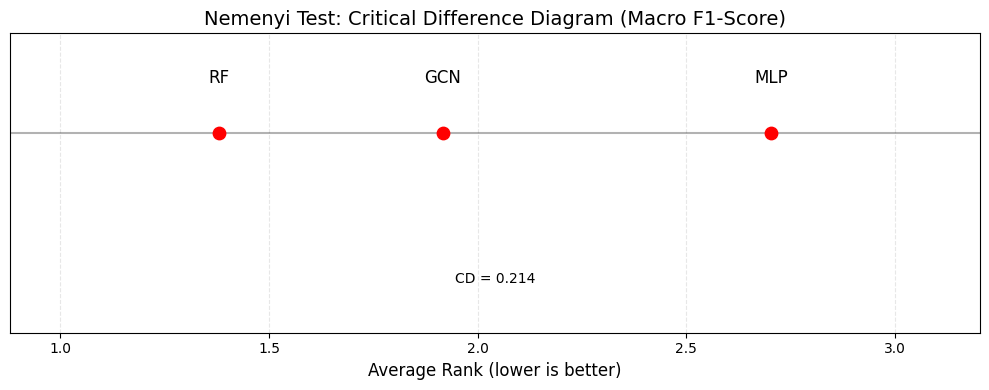


2. MODEL COMPARISON BY EDGE STRATEGY:

--- Edge Strategy: MST ---

Friedman Test Results:
Statistic: 26.2500
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.6978
MLP: 0.6636
RF: 0.7086

Average Rankings (lower is better):
GCN: 1.875
MLP: 2.625
RF: 1.500

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.5239

Pairwise Comparisons:
GCN vs MLP: Diff = 0.750, Significant
GCN vs RF: Diff = 0.375, Not significant
MLP vs RF: Diff = 1.125, Significant


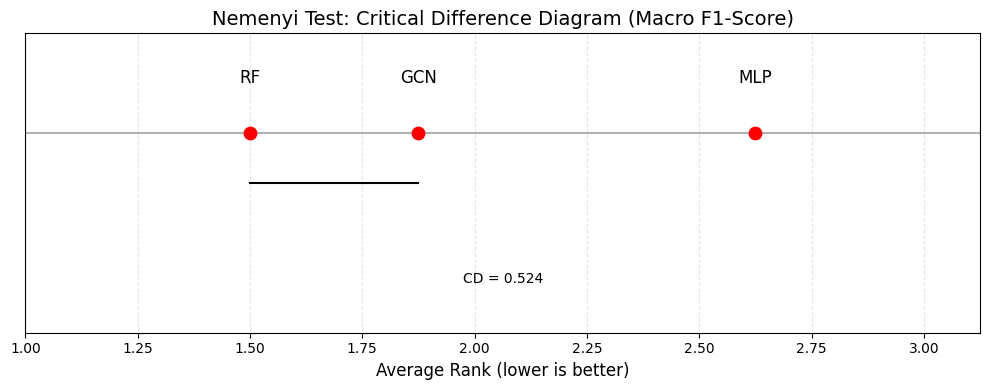


--- Edge Strategy: QB-CLOSEST- ---

Friedman Test Results:
Statistic: 57.0500
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.6890
MLP: 0.6645
RF: 0.7093

Average Rankings (lower is better):
GCN: 1.875
MLP: 2.900
RF: 1.225

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.5239

Pairwise Comparisons:
GCN vs MLP: Diff = 1.025, Significant
GCN vs RF: Diff = 0.650, Significant
MLP vs RF: Diff = 1.675, Significant


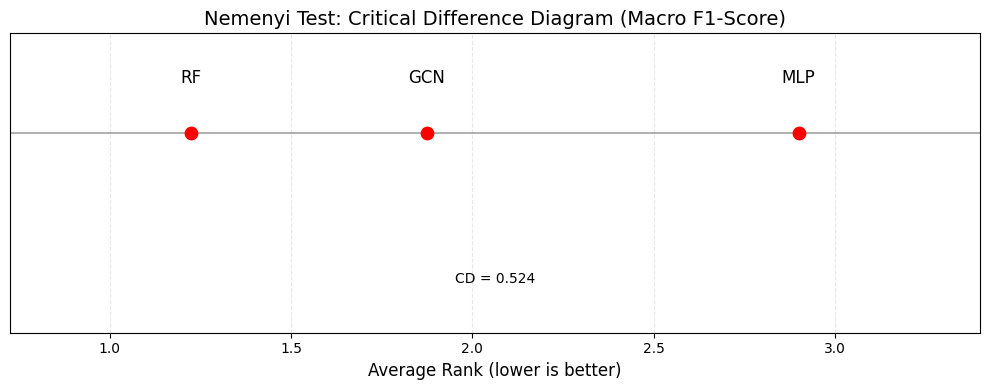


--- Edge Strategy: CLOSEST- ---

Friedman Test Results:
Statistic: 68.4500
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.7245
MLP: 0.6624
RF: 0.7089

Average Rankings (lower is better):
GCN: 1.175
MLP: 3.000
RF: 1.825

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.5239

Pairwise Comparisons:
GCN vs MLP: Diff = 1.825, Significant
GCN vs RF: Diff = 0.650, Significant
MLP vs RF: Diff = 1.175, Significant


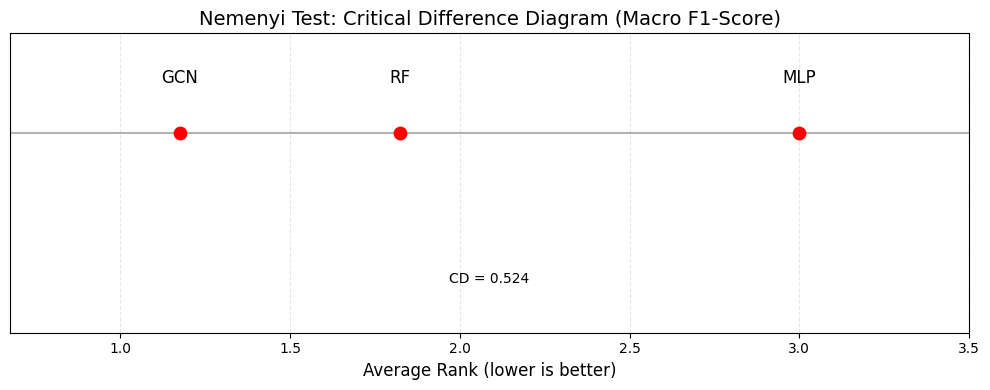


--- Edge Strategy: DELAUNAY ---

Friedman Test Results:
Statistic: 54.2000
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.6613
MLP: 0.6634
RF: 0.7092

Average Rankings (lower is better):
GCN: 2.450
MLP: 2.500
RF: 1.050

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.5239

Pairwise Comparisons:
GCN vs MLP: Diff = 0.050, Not significant
GCN vs RF: Diff = 1.400, Significant
MLP vs RF: Diff = 1.450, Significant


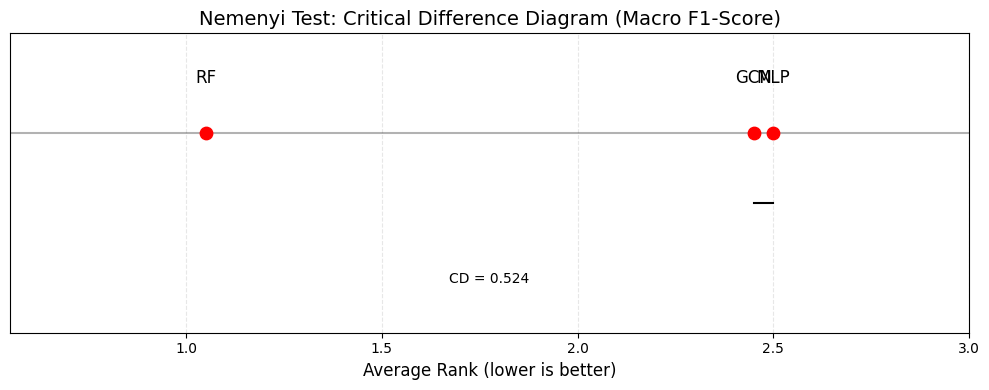


--- Edge Strategy: GABRIEL ---

Friedman Test Results:
Statistic: 42.9500
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.6716
MLP: 0.6638
RF: 0.7094

Average Rankings (lower is better):
GCN: 2.250
MLP: 2.575
RF: 1.175

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.5239

Pairwise Comparisons:
GCN vs MLP: Diff = 0.325, Not significant
GCN vs RF: Diff = 1.075, Significant
MLP vs RF: Diff = 1.400, Significant


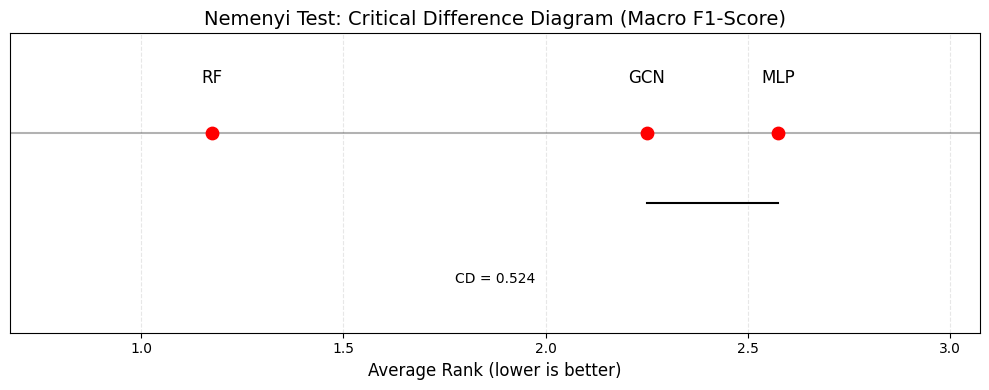


--- Edge Strategy: RNG ---

Friedman Test Results:
Statistic: 26.2500
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.6850
MLP: 0.6646
RF: 0.7090

Average Rankings (lower is better):
GCN: 1.875
MLP: 2.625
RF: 1.500

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.5239

Pairwise Comparisons:
GCN vs MLP: Diff = 0.750, Significant
GCN vs RF: Diff = 0.375, Not significant
MLP vs RF: Diff = 1.125, Significant


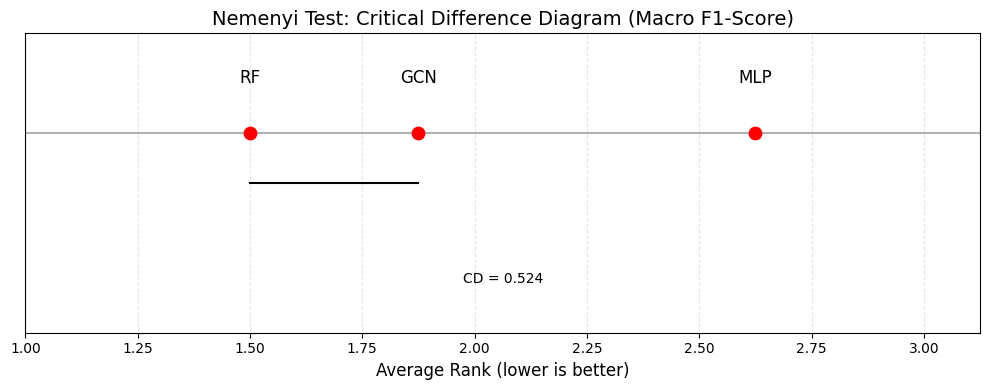


3. MODEL COMPARISON BY DOWN_SAMPLE SETTING:

--- DOWN_SAMPLE = True ---

Friedman Test Results:
Statistic: 107.4667
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.6769
MLP: 0.6656
RF: 0.7145

Average Rankings (lower is better):
GCN: 2.067
MLP: 2.633
RF: 1.300

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.3025

Pairwise Comparisons:
GCN vs MLP: Diff = 0.567, Significant
GCN vs RF: Diff = 0.767, Significant
MLP vs RF: Diff = 1.333, Significant


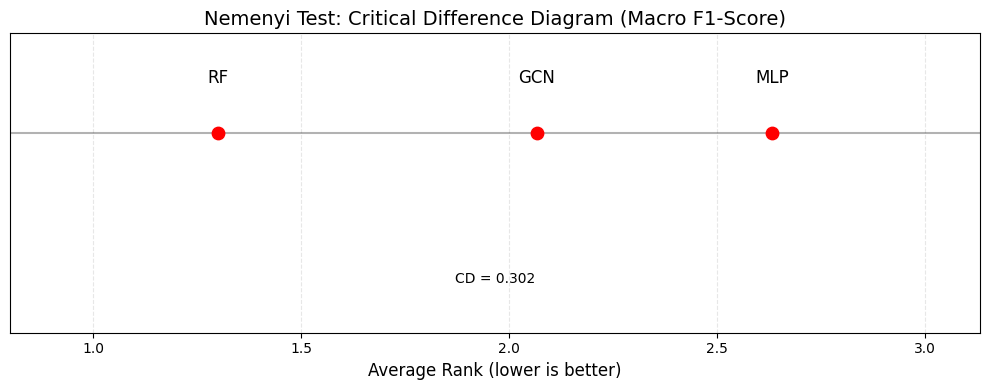


--- DOWN_SAMPLE = False ---

Friedman Test Results:
Statistic: 113.8167
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.6995
MLP: 0.6619
RF: 0.7036

Average Rankings (lower is better):
GCN: 1.767
MLP: 2.775
RF: 1.458

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.3025

Pairwise Comparisons:
GCN vs MLP: Diff = 1.008, Significant
GCN vs RF: Diff = 0.308, Significant
MLP vs RF: Diff = 1.317, Significant


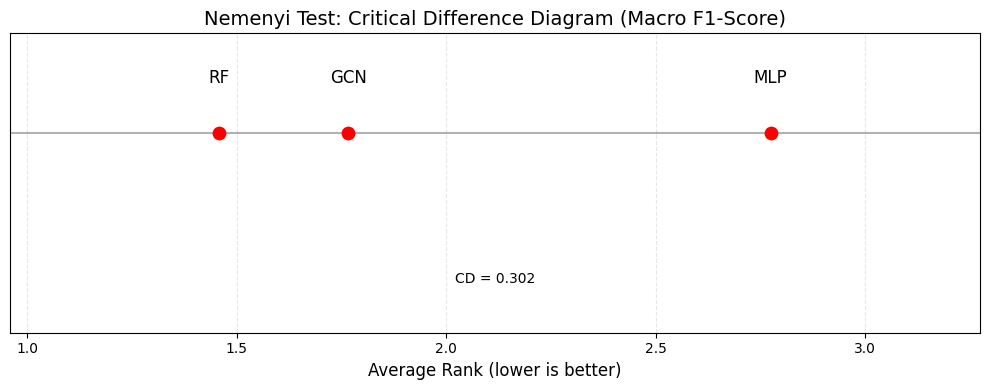


4. MODEL COMPARISON BY QB_LINK SETTING:

--- QB_LINK = True ---

Friedman Test Results:
Statistic: 125.0667
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.6583
MLP: 0.6642
RF: 0.7094

Average Rankings (lower is better):
GCN: 2.400
MLP: 2.433
RF: 1.167

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.3025

Pairwise Comparisons:
GCN vs MLP: Diff = 0.033, Not significant
GCN vs RF: Diff = 1.233, Significant
MLP vs RF: Diff = 1.267, Significant


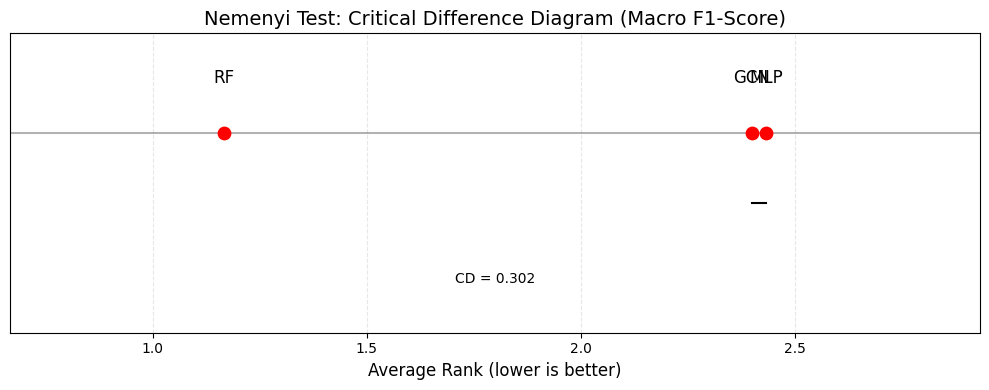


--- QB_LINK = False ---

Friedman Test Results:
Statistic: 172.6167
p-value: 0.0000

Average Macro F1-Scores:
GCN: 0.7180
MLP: 0.6632
RF: 0.7088

Average Rankings (lower is better):
GCN: 1.433
MLP: 2.975
RF: 1.592

The Friedman test shows significant differences between models (p < 0.05).

Critical Difference (CD) for Nemenyi test: 0.3025

Pairwise Comparisons:
GCN vs MLP: Diff = 1.542, Significant
GCN vs RF: Diff = 0.158, Not significant
MLP vs RF: Diff = 1.383, Significant


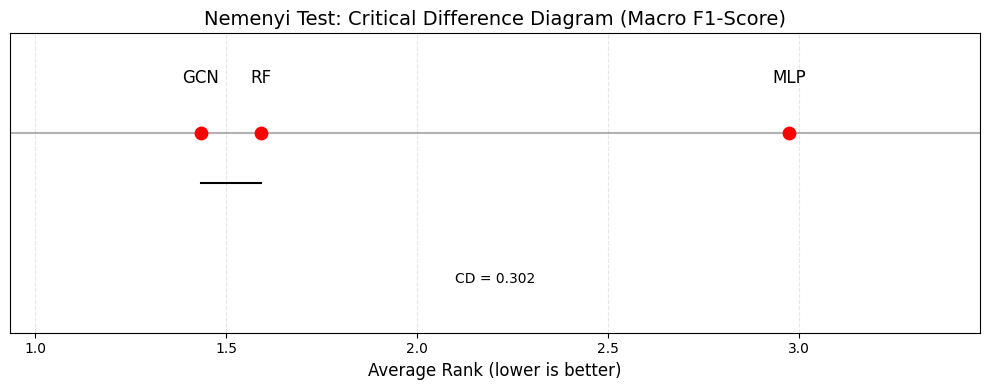

In [21]:
###############################################################################################################################
###############################################################################################################################
# NEMENYI STATISTICAL TEST FOR MODEL COMPARISON - UPDATED TO USE F1
###############################################################################################################################
###############################################################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare, rankdata

def perform_friedman_nemenyi_test(df):
    """
    Perform Friedman test followed by post-hoc Nemenyi test.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with model macro F1-scores
    
    Returns:
    None (displays results and plots)
    """
    # Extract performance data
    models = ['GCN_MACRO_F1_SCORE', 'MLP_MACRO_F1_SCORE', 'RF_MACRO_F1_SCORE']
    model_names = ['GCN', 'MLP', 'RF']
    
    # Check if we have enough data
    if len(df) < 2:
        print(f"Not enough samples for statistical test (n={len(df)})")
        return
    
    # Extract F1-scores
    f1_scores = [df[model].values for model in models]
    
    # Perform Friedman test
    friedman_stat, p_value = friedmanchisquare(*f1_scores)
    
    print("\nFriedman Test Results:")
    print(f"Statistic: {friedman_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    # Calculate average performance for each model
    avg_f1_scores = [np.mean(f1) for f1 in f1_scores]
    print("\nAverage Macro F1-Scores:")
    for i, name in enumerate(model_names):
        print(f"{name}: {avg_f1_scores[i]:.4f}")
    
    # Calculate rankings for each configuration (higher F1-score = better rank)
    data = np.array(f1_scores).T  # configs x models
    rankings = np.zeros_like(data)
    for i in range(len(df)):
        # Convert to rankings (1 is best)
        rankings[i] = rankdata(-data[i])
    
    # Average rankings
    avg_ranks = np.mean(rankings, axis=0)
    print("\nAverage Rankings (lower is better):")
    for i, name in enumerate(model_names):
        print(f"{name}: {avg_ranks[i]:.3f}")
    
    if p_value < 0.05:
        print("\nThe Friedman test shows significant differences between models (p < 0.05).")
        
        # Calculate Critical Difference for Nemenyi test
        k = len(models)  # number of models
        n = len(df)      # number of configurations/datasets
        
        # Critical values for alpha=0.05, approximated
        q_alpha = {
            2: 1.960, 3: 2.343, 4: 2.569, 5: 2.728,
            6: 2.850, 7: 2.949, 8: 3.031, 9: 3.102,
            10: 3.164
        }.get(k, 2.343)  # Default to k=3 if not in table
        
        cd = q_alpha * np.sqrt((k * (k + 1)) / (6 * n))
        print(f"\nCritical Difference (CD) for Nemenyi test: {cd:.4f}")
        
        # Check which models have significantly different performance
        print("\nPairwise Comparisons:")
        for i in range(k):
            for j in range(i+1, k):
                diff = abs(avg_ranks[i] - avg_ranks[j])
                is_significant = diff > cd
                print(f"{model_names[i]} vs {model_names[j]}: Diff = {diff:.3f}, {'Significant' if is_significant else 'Not significant'}")
        
        # Plot CD diagram
        plt.figure(figsize=(10, 4))
        plt.title('Nemenyi Test: Critical Difference Diagram (Macro F1-Score)', fontsize=14)
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        
        # Sort by average rank (lower is better)
        sorted_idx = np.argsort(avg_ranks)
        sorted_ranks = avg_ranks[sorted_idx]
        sorted_names = [model_names[i] for i in sorted_idx]
        
        # Plot models on the line
        plt.scatter(sorted_ranks, [0] * len(sorted_ranks), s=80, color='red', zorder=3)
        
        # Add model names
        for i, (r, n) in enumerate(zip(sorted_ranks, sorted_names)):
            plt.annotate(n, (r, 0.05), ha='center', fontsize=12)
        
        # Connect models that are not significantly different
        y_offset = -0.05
        for i in range(len(sorted_ranks)):
            for j in range(i+1, len(sorted_ranks)):
                idx1, idx2 = sorted_idx[i], sorted_idx[j]
                diff = abs(avg_ranks[idx1] - avg_ranks[idx2])
                if diff <= cd:  # Not significantly different
                    y = y_offset - (0.02 * i)  # Adjust to avoid overlapping lines
                    plt.plot([sorted_ranks[i], sorted_ranks[j]], [y, y], 'k-', linewidth=1.5)
        
        # Show CD value
        min_rank, max_rank = min(sorted_ranks), max(sorted_ranks)
        plt.annotate(f"CD = {cd:.3f}", 
                     xy=(0.5 * (min_rank + max_rank), -0.15),
                     ha='center', fontsize=10)
        
        plt.xlim(min(sorted_ranks) - 0.5, max(sorted_ranks) + 0.5)
        plt.ylim(-0.2, 0.1)
        plt.yticks([])
        plt.xlabel('Average Rank (lower is better)', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("\nThe Friedman test does not show significant differences between models (p > 0.05).")

print("NEMENYI TEST ANALYSIS FOR MODEL COMPARISON")
print("==========================================")

# Overall comparison
print("\n1. OVERALL MODEL COMPARISON:")
perform_friedman_nemenyi_test(expanded_df)

# By edge strategy
print("\n2. MODEL COMPARISON BY EDGE STRATEGY:")
for strategy in expanded_df['EDGE_STRATEGY'].unique():
    print(f"\n--- Edge Strategy: {strategy} ---")
    strategy_df = expanded_df[expanded_df['EDGE_STRATEGY'] == strategy]
    perform_friedman_nemenyi_test(strategy_df)

# By DOWN_SAMPLE setting
print("\n3. MODEL COMPARISON BY DOWN_SAMPLE SETTING:")
for down_sample in [True, False]:
    print(f"\n--- DOWN_SAMPLE = {down_sample} ---")
    ds_df = expanded_df[expanded_df['DOWN_SAMPLE'] == down_sample]
    perform_friedman_nemenyi_test(ds_df)

# By QB_LINK setting
print("\n4. MODEL COMPARISON BY QB_LINK SETTING:")
for qb_link in [True, False]:
    print(f"\n--- QB_LINK = {qb_link} ---")
    qb_df = expanded_df[expanded_df['QB_LINK'] == qb_link]
    perform_friedman_nemenyi_test(qb_df)